In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/podsyp/time-series-starter-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohammadrachman
Your Kaggle Key: ··········


100%|██████████| 1.86k/1.86k [00:00<00:00, 1.36MB/s]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [ ]:
df = pd.read_csv('/content/time-series-starter-dataset/Month_Value_1.csv')
df.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


In [ ]:
def parser(s):
  return datetime.strptime(s,'%d.%m.%Y')

In [ ]:
df = pd.read_csv('/content/time-series-starter-dataset/Month_Value_1.csv',parse_dates=['Period'],index_col='Period',date_parser=parser).dropna()

In [ ]:
df

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-02-01,1.580759e+07,11636.0,1358.507000,30024676.0
2015-03-01,2.204715e+07,15922.0,1384.697024,30024676.0
2015-04-01,1.881458e+07,15227.0,1235.606705,30024676.0
2015-05-01,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...
2019-12-01,5.875647e+07,38069.0,1543.420464,29878525.0
2020-01-01,5.628830e+07,27184.0,2070.640850,29044998.0
2020-02-01,4.022524e+07,23509.0,1711.057181,29044998.0


In [ ]:
df.isnull().sum()

Revenue                                     0
Sales_quantity                              0
Average_cost                                0
The_average_annual_payroll_of_the_region    0
dtype: int64

In [ ]:
df.drop(['2015-07-01','2015-09-01','2015-12-01'],inplace=True)

In [ ]:
df.iloc[0:10]

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-02-01,1.580759e+07,11636.0,1358.507000,30024676.0
2015-03-01,2.204715e+07,15922.0,1384.697024,30024676.0
2015-04-01,1.881458e+07,15227.0,1235.606705,30024676.0
2015-05-01,1.402148e+07,8620.0,1626.621765,30024676.0
2015-06-01,1.678393e+07,13160.0,1275.374508,30024676.0
2015-08-01,1.520498e+07,8642.0,1759.428870,30024676.0
2015-10-01,2.099287e+07,18135.0,1157.588904,30024676.0
2015-11-01,1.499337e+07,10841.0,1383.024597,30024676.0


More details with the [DateOffset Alias]('https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases')

In [ ]:
df = df.asfreq(freq='MS')
df.isnull().sum()

Revenue                                     3
Sales_quantity                              3
Average_cost                                3
The_average_annual_payroll_of_the_region    3
dtype: int64

<AxesSubplot:xlabel='Period'>

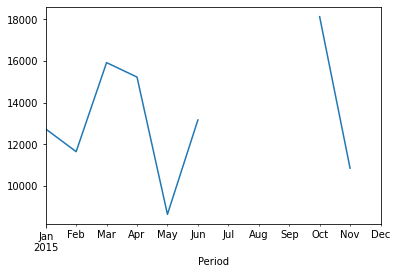

In [ ]:
df['Sales_quantity'].loc['2015-01-01':'2015-12-01'].plot()

In [ ]:
df.fillna(method='backfill',inplace=True)

<AxesSubplot:xlabel='Period'>

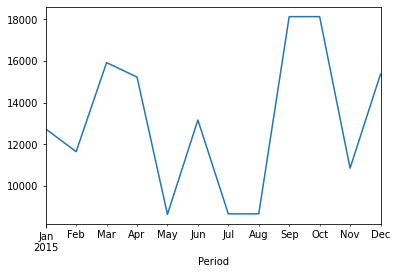

In [ ]:
df['Sales_quantity'].loc['2015-01-01':'2015-12-01'].plot()

### Difference between asfreq and resample

In [ ]:
df.asfreq(freq='YS').mean()

Revenue                                     3.623914e+07
Sales_quantity                              1.934583e+04
Average_cost                                1.843213e+03
The_average_annual_payroll_of_the_region    2.873018e+07
dtype: float64

In [ ]:
test = df.asfreq(freq='YS')
test.mean()

Revenue                                     3.623914e+07
Sales_quantity                              1.934583e+04
Average_cost                                1.843213e+03
The_average_annual_payroll_of_the_region    2.873018e+07
dtype: float64

In [ ]:
df.resample('YS').mean()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,1.828962e+07,13087.833333,1434.758933,29841667.25
2016-01-01,2.673396e+07,15468.666667,1748.414886,27828571.00
2017-01-01,3.150706e+07,18037.000000,1776.828897,27406473.00
2018-01-01,3.667935e+07,21392.916667,1757.193044,28197847.00
2019-01-01,4.257787e+07,24129.083333,1810.749875,29878525.00
2020-01-01,4.971410e+07,27469.250000,1820.853892,29044998.00


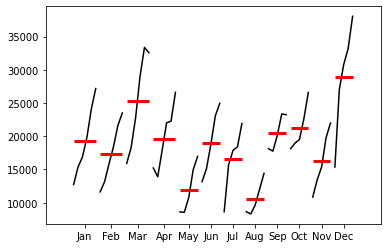

In [ ]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(df.Sales_quantity);

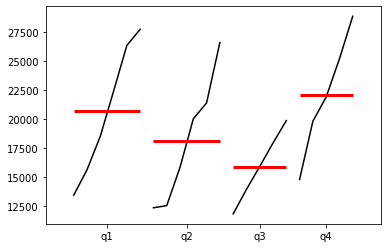

In [ ]:
from statsmodels.graphics.tsaplots import quarter_plot 
quarter_plot(df.Sales_quantity.resample('Q').mean());

###----

In [ ]:
data = df.Sales_quantity

In [ ]:
data

Period
2015-01-01    12729.0
2015-02-01    11636.0
2015-03-01    15922.0
2015-04-01    15227.0
2015-05-01     8620.0
               ...   
2019-12-01    38069.0
2020-01-01    27184.0
2020-02-01    23509.0
2020-03-01    32569.0
2020-04-01    26615.0
Freq: MS, Name: Sales_quantity, Length: 64, dtype: float64

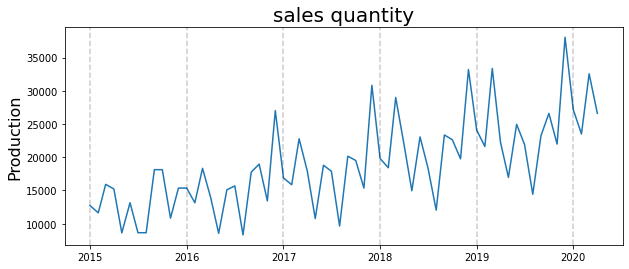

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(data)
plt.title('sales quantity', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

### Stationery Test

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [ ]:
adf_test(data)

ADF Statistic: -0.002507
p-value: 0.958324


### Handling Stationery

In [ ]:
first_diff = data.diff().fillna(0)
first_diff

Period
2015-01-01        0.0
2015-02-01    -1093.0
2015-03-01     4286.0
2015-04-01     -695.0
2015-05-01    -6607.0
               ...   
2019-12-01    16082.0
2020-01-01   -10885.0
2020-02-01    -3675.0
2020-03-01     9060.0
2020-04-01    -5954.0
Freq: MS, Name: Sales_quantity, Length: 64, dtype: float64

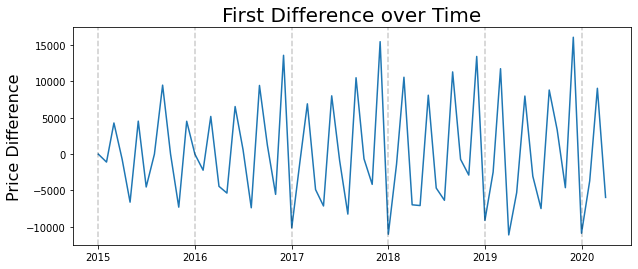

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('First Difference over Time', fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [ ]:
adf_test(first_diff)

ADF Statistic: -9.720142
p-value: 0.000000


### Autocorrelation

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

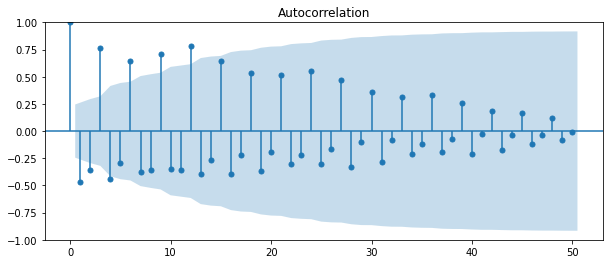

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
acf_plot = plot_acf(first_diff, lags=50,ax=ax)

ACF help us to identify Moving Average Model

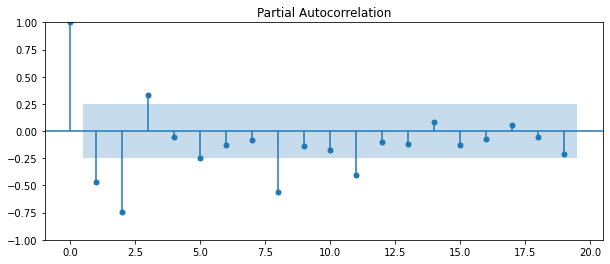

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
pacf_plot = plot_pacf(first_diff,ax=ax,method='ywm')

Based on PACF, we should start with an Auto Regressive model with lags 1,2,3,8,11

In [ ]:
#splitting train and test
train=first_diff[:50] 
test=first_diff[50:]

len(test)

14

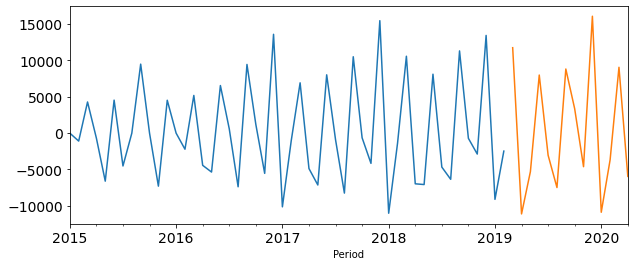

In [ ]:
train.plot(figsize=(10,4), fontsize=14)
test.plot(figsize=(10,4), fontsize=14)

plt.show()

In [ ]:
train.index

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01'],
              dtype='datetime64[ns]', name='Period', freq='MS')

In [ ]:
df.index

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

the data train has no frequency

In [ ]:
train = train.asfreq(freq='MS')

## Auto Regressive Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(8,0,0))
model_fit = model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
predictions = model_fit.predict(start='2019-03-01', end='2020-04-01')

Text(0, 0.5, 'Sales')

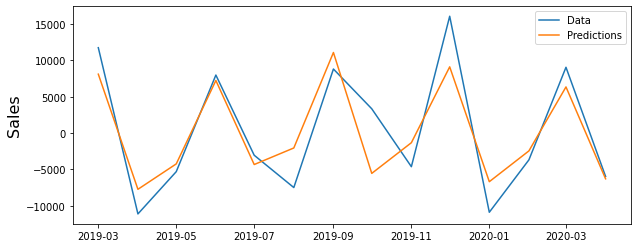

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(test)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=10)

plt.ylabel('Sales', fontsize=16)

### Model Evaluation

In [ ]:
def diff_inv(predictions, last_value_data_train):
  series_inverted = np.concatenate([last_value_data_train, predictions],axis=None).cumsum().astype('float64')[1:]
  return series_inverted

In [ ]:
y_pred = pd.Series(diff_inv(predictions,data[-1]),index=test.index)

In [ ]:
y_pred

Period
2019-03-01    34726.249926
2019-04-01    26999.210020
2019-05-01    22768.467625
2019-06-01    30014.492787
2019-07-01    25695.728668
2019-08-01    23655.126010
2019-09-01    34749.334617
2019-10-01    29211.768270
2019-11-01    27894.684074
2019-12-01    37015.121500
2020-01-01    30335.297327
2020-02-01    27892.275311
2020-03-01    34248.406067
2020-04-01    27965.398909
Freq: MS, dtype: float64

In [ ]:
y_test = data[49:].shift(1) + test
y_test.dropna(inplace=True)
y_test

Period
2019-03-01    33379.0
2019-04-01    22265.0
2019-05-01    16967.0
2019-06-01    24958.0
2019-07-01    21917.0
2019-08-01    14431.0
2019-09-01    23253.0
2019-10-01    26603.0
2019-11-01    21987.0
2019-12-01    38069.0
2020-01-01    27184.0
2020-02-01    23509.0
2020-03-01    32569.0
2020-04-01    26615.0
Freq: MS, Name: Sales_quantity, dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
mean_absolute_percentage_error(y_test,y_pred)

0.20733106843537666

In [ ]:
mean_absolute_error(y_test, y_pred)

4398.094150755801

In [ ]:
data.mean()

18988.484375

In [ ]:
#splitting train and test
train=data[:50] 
test=data[50:]

len(test)

14

### ----

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(8,1,0))
model_fit = model.fit()

In [ ]:
predictions = model_fit.predict(start='2019-03-01', end='2020-04-01')

Text(0, 0.5, 'Sales')

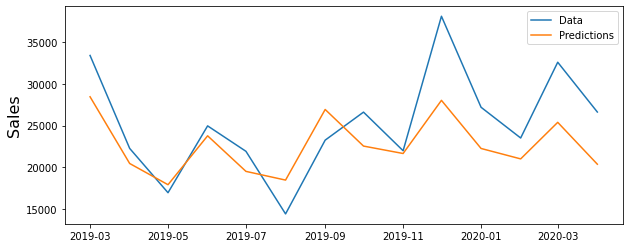

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(test)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=10)

plt.ylabel('Sales', fontsize=16)

In [ ]:
mean_absolute_error(test, predictions)

3878.4530847692436

In [ ]:
mean_absolute_percentage_error(test,predictions)

0.1467795109941715

## Moving Average Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(0,0,3))
model_fit = model.fit()

In [ ]:
predictions = model_fit.predict(start='2019-03-01', end='2019-05-01')

Text(0, 0.5, 'Sales')

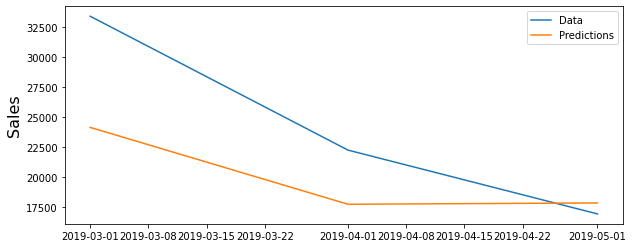

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(test[:3])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=10)

plt.ylabel('Sales', fontsize=16)

In [ ]:
mean_absolute_error(test[:3], predictions)

4878.491443283336

In [ ]:
mean_absolute_percentage_error(test[:3],predictions)

0.17736644153339468

### Trend vs Cyclical vs Seasonal

![img](https://pressbooks.senecacollege.ca/app/uploads/sites/48/2019/11/ChapterThree4.png)

### Classic Time Series Decomposition (1920)

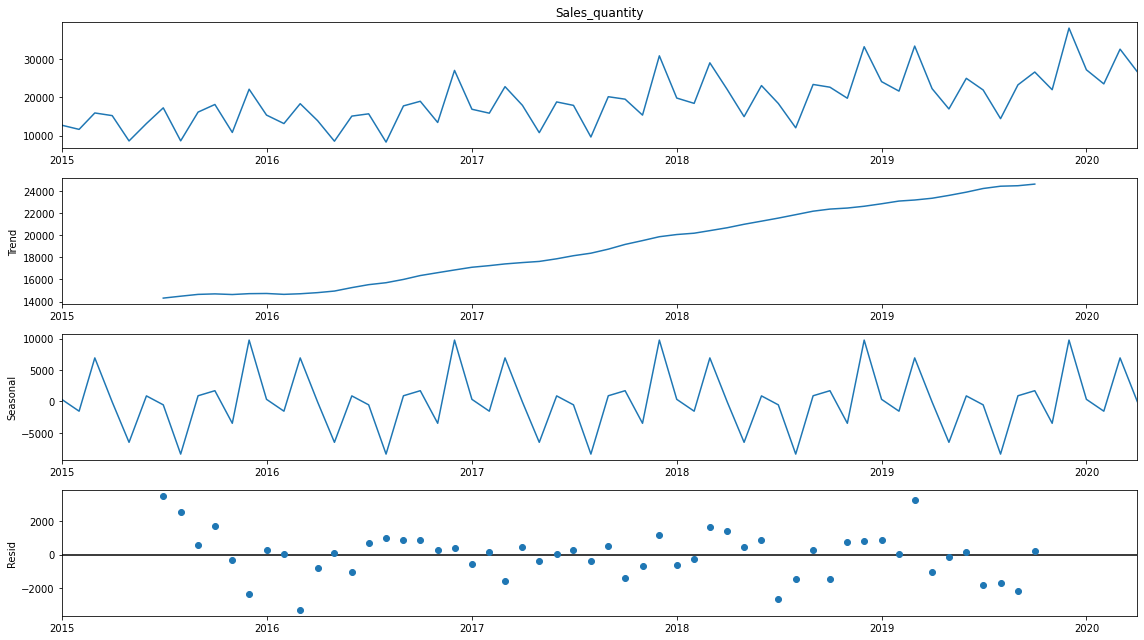

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(data, model='additive')
fig = decomposed.plot()
fig.set_size_inches((16, 9))

fig.tight_layout()
plt.show();

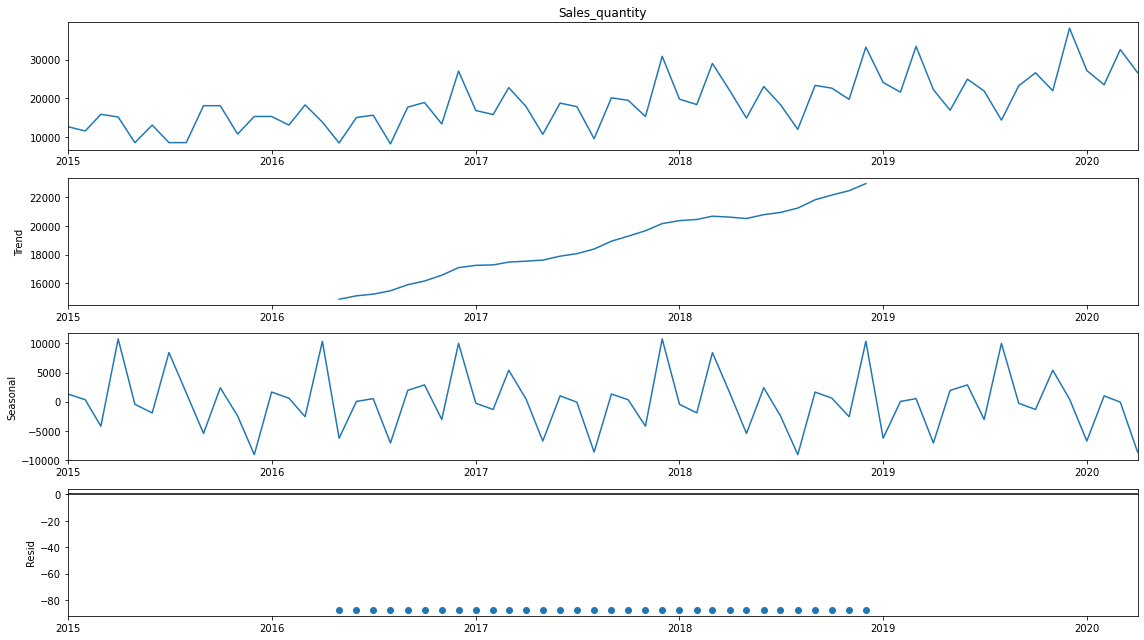

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(data, model='additive',period=32)
fig = decomposed.plot()
fig.set_size_inches((16, 9))

fig.tight_layout()
plt.show();

### Seasonal Decomposition with LOESS (STL 1990)

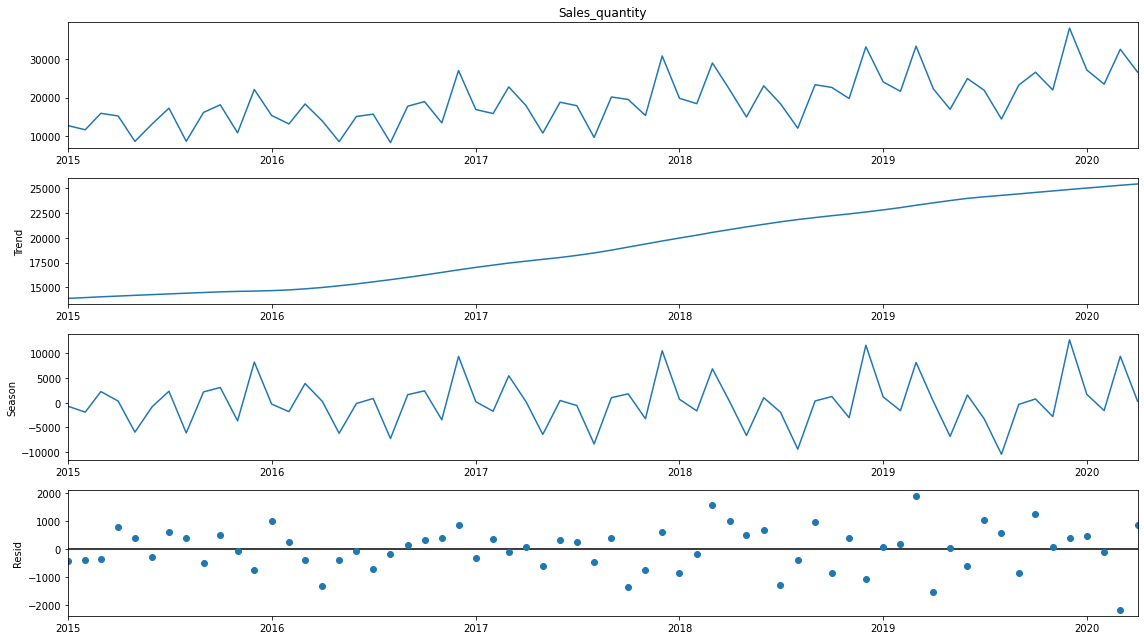

In [ ]:
from statsmodels.tsa.seasonal import STL

res = STL(data,seasonal=13,period=12).fit()
ax=res.plot()
ax.set_size_inches((16, 9)) 
ax.tight_layout()
plt.show()

## Seasonal ARIMA Exogenous (SARIMAX)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

note : you can't choose lag are in both the seasonal and non-seasonal autoregressive components.

In [ ]:
train_exogen = df['Average_cost'][:50]
test_exogen = df['Average_cost'][50:]

In [ ]:
my_order = (8,1,3)
my_seasonal_order = (2, 1, 3, 12)
# define model
model = SARIMAX(train, order=my_order, seasonal_order=my_seasonal_order,exog=train_exogen).fit()
#model_fit = model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
predictions = model.predict(start='2019-03-01', end='2020-04-01',exog=test_exogen)

Text(0, 0.5, 'Sales')

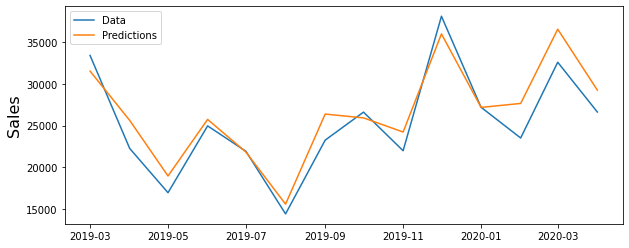

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(test)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=10)

plt.ylabel('Sales', fontsize=16)

In [ ]:
mean_absolute_error(test, predictions)

2009.9706664965265

In [ ]:
mean_absolute_percentage_error(test,predictions)

0.08244990348196159

### Exponential Smoothing

In [ ]:
data2 = pd.read_csv('https://raw.githubusercontent.com/WiraDKP/time_series/master/24%20-%20Classic%20Time%20Series/data/cheese_fred.csv',index_col='date',parse_dates=['date'])

<AxesSubplot:xlabel='date'>

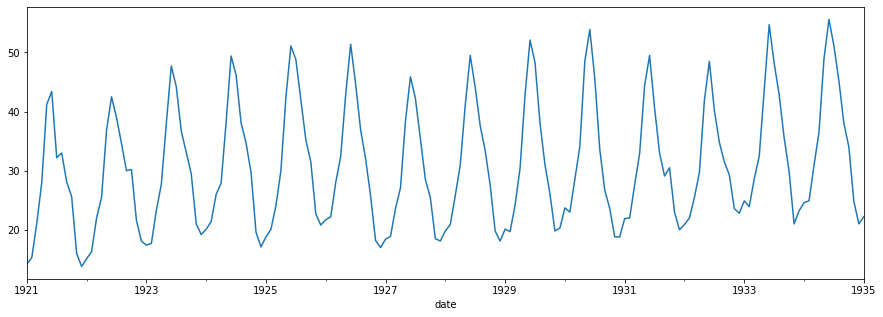

In [ ]:
series = data2.total_cheese_production.copy()
train, test = series[:-25],series[-25:]
series.plot(figsize=(15,5))

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
exp_model = ExponentialSmoothing(train ,seasonal_periods=12 ,trend="add", seasonal='add',use_boxcox=True).fit(optimized=True)
predictions = exp_model.forecast(len(test))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0, 0.5, 'Sales')

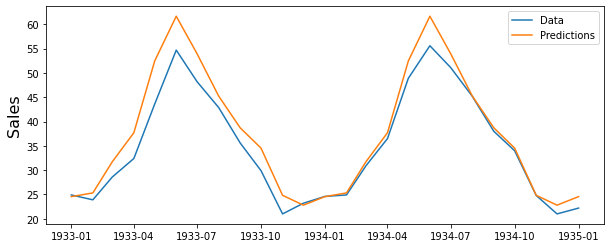

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(test)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=10)

plt.ylabel('Sales', fontsize=16)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
mean_absolute_error(test, predictions)

4.570174549415679

In [ ]:
mean_absolute_percentage_error(test,predictions)

0.12779908502939127

In [ ]:
data3 = pd.read_csv('https://raw.githubusercontent.com/WiraDKP/time_series/master/24%20-%20Classic%20Time%20Series/data/airline.csv',index_col='Date',parse_dates=['Date'])

<AxesSubplot:xlabel='Date'>

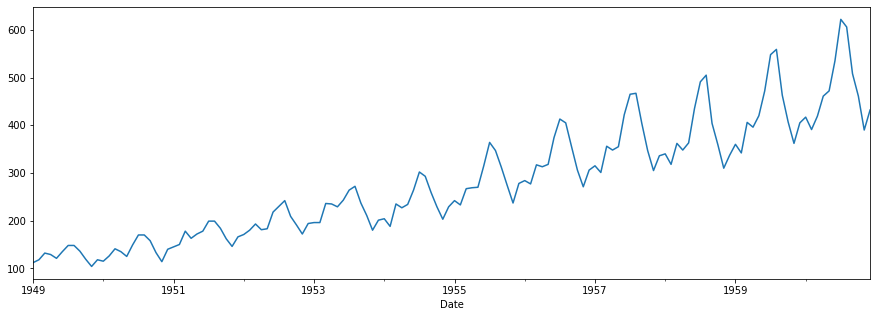

In [ ]:
series1 = data3.passengers.copy()
train1, test1 = series1[:-25],series1[-25:]
series1.plot(figsize=(15,5))

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
exp_model = ExponentialSmoothing(train1 ,seasonal_periods=12 ,trend="add", seasonal='mul',use_boxcox=True).fit(optimized=True)
predictions = exp_model.forecast(len(test1))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0, 0.5, 'Sales')

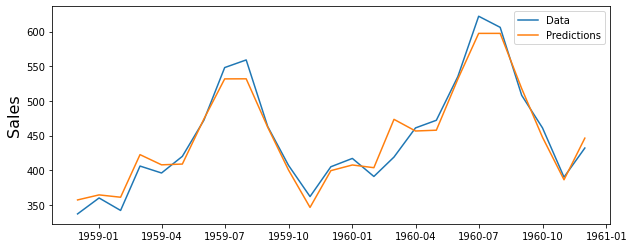

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(test1)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=10)

plt.ylabel('Sales', fontsize=16)

In [ ]:
mean_absolute_error(test1, predictions)

13.22732091843321

In [ ]:
mean_absolute_percentage_error(test1,predictions)

0.030359542310476228

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
exp_model = ExponentialSmoothing(train ,seasonal_periods=12 ,trend='additive', seasonal='multiplicative').fit()
predictions = exp_model.forecast(len(test))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0, 0.5, 'Sales')

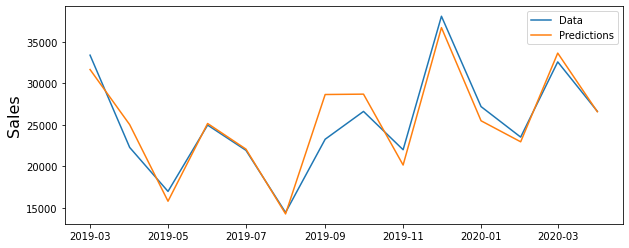

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(test)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=10)

plt.ylabel('Sales', fontsize=16)

In [ ]:
mean_absolute_error(test, predictions)

1445.2831054572068

In [ ]:
mean_absolute_percentage_error(test,predictions)

0.05873111990750731

### Fb Prophet

In [ ]:
! pip install pystan==2.18.0.0
! pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.18.0.0-cp38-cp38-linux_x86_64.whl size=60178777 sha256=5e0eca2cee7d43044e063cb70d9ba47970a67b3d04042d45aa7797f33d78378c
  Stored in directory: /root/.cache/pip/wheels/c9/8d/a0/87147a86c11b867cb8e500fa47c9dd551624c336159f4a7b9f
Successfully built pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=8944186 sha256=864760bfea3f34eff453a962581cf13774cf7c5309ac8fed8

In [ ]:
from fbprophet import Prophet

In [ ]:
df1 = data.copy()

In [ ]:
#renaming variable
df1 = df1.reset_index()
df1.rename(columns = {'Sales_quantity' : 'y','Period':'ds'},inplace=True)
df1.head()

,ds,y
0,2015-01-01,12729.0
1,2015-02-01,11636.0
2,2015-03-01,15922.0
3,2015-04-01,15227.0
4,2015-05-01,8620.0


In [ ]:
test_days = 14
training_set = df1.iloc[:-test_days, :]
test_set = df1.iloc[-test_days:, :]

,ds,y
50,2019-03-01,33379.0
51,2019-04-01,22265.0
52,2019-05-01,16967.0
53,2019-06-01,24958.0
54,2019-07-01,21917.0
55,2019-08-01,14431.0
56,2019-09-01,23253.0
57,2019-10-01,26603.0
58,2019-11-01,21987.0
59,2019-12-01,38069.0


[fbprophet doc]('https://facebook.github.io/prophet/docs/diagnostics.html')

Parameters that can be tuned : <br /> 
<br />
changepoint_prior_scale : This is probably the most impactful parameter. It determines the flexibility of the trend, and in particular how much the trend changes at the trend changepoints.The default of 0.05 works for many time series, but this could be tuned; a range of [0.001, 0.5] <br />
<br />
seasonality_prior_scale : This parameter controls the flexibility of the seasonality. Similarly, a large value allows the seasonality to fit large fluctuations, a small value shrinks the magnitude of the seasonality. The default is 10,  A reasonable range for tuning it would probably be [0.01, 10] <br />
<br />
holidays_prior_scale : This controls flexibility to fit holiday effects. Similar to seasonality_prior_scale, it defaults to 10.0 which applies basically no regularization, since we usually have multiple observations of holidays and can do a good job of estimating their effects. This could also be tuned on a range of [0.01, 10] as with seasonality_prior_scale.<br />
<br />
seasonality_mode: Options are ['additive', 'multiplicative']. Default is 'additive', but many business time series will have multiplicative seasonality. This is best identified just from looking at the time series and seeing if the magnitude of seasonal fluctuations grows with the magnitude of the time series .<br />


In [ ]:
m = Prophet(
            changepoint_prior_scale = 0.04,
            seasonality_prior_scale =0.04,
            holidays_prior_scale = 0,
            seasonality_mode ='multiplicative'
            )
m.fit(training_set)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods = len(test_set),
                                 freq = "M")

In [ ]:
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2015-01-01,11519.115959,9575.753501,13739.670394,11519.115959,11519.115959,0.018225,0.018225,0.018225,0.018225,0.018225,0.018225,0.0,0.0,0.0,11729.054044
1,2015-02-01,11761.012067,8804.804633,12913.921832,11761.012067,11761.012067,-0.077568,-0.077568,-0.077568,-0.077568,-0.077568,-0.077568,0.0,0.0,0.0,10848.737540
2,2015-03-01,11979.498874,13547.501710,17600.760712,11979.498874,11979.498874,0.299787,0.299787,0.299787,0.299787,0.299787,0.299787,0.0,0.0,0.0,15570.796774
3,2015-04-01,12221.394981,10668.423954,14622.629826,12221.394981,12221.394981,0.041448,0.041448,0.041448,0.041448,0.041448,0.041448,0.0,0.0,0.0,12727.947745
4,2015-05-01,12455.487989,6745.601464,10515.541606,12455.487989,12455.487989,-0.304783,-0.304783,-0.304783,-0.304783,-0.304783,-0.304783,0.0,0.0,0.0,8659.268726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2019-11-30,25517.962325,33858.868465,37782.287213,25517.960376,25517.964282,0.409311,0.409311,0.409311,0.409311,0.409311,0.409311,0.0,0.0,0.0,35962.754997
60,2019-12-31,25759.860472,23905.442277,27882.780688,25759.858205,25759.862800,0.006046,0.006046,0.006046,0.006046,0.006046,0.006046,0.0,0.0,0.0,25915.615702
61,2020-01-31,26001.758620,22183.975851,26147.781543,26001.756068,26001.761320,-0.068668,-0.068668,-0.068668,-0.068668,-0.068668,-0.068668,0.0,0.0,0.0,24216.273169
62,2020-02-29,26228.050435,31988.120078,36239.687712,26228.047578,26228.053488,0.301639,0.301639,0.301639,0.301639,0.301639,0.301639,0.0,0.0,0.0,34139.442305


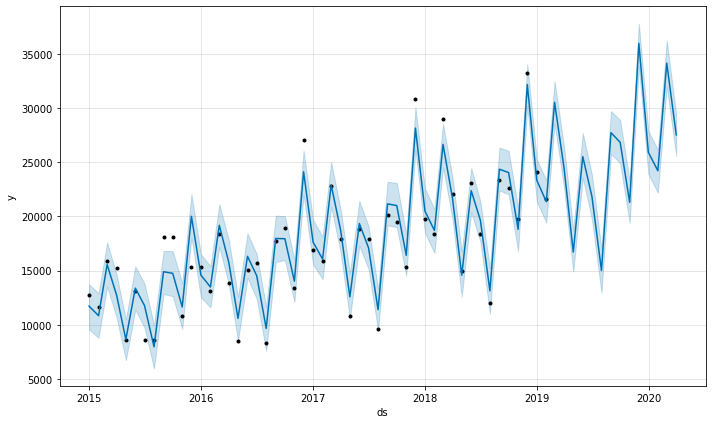

In [ ]:
plot1 = m.plot(forecast)

In [ ]:
predictions_prophet = forecast.yhat[-test_days:].rename("predictions")
predictions_prophet = predictions_prophet.set_axis(test.index)

Text(0, 0.5, 'Sales')

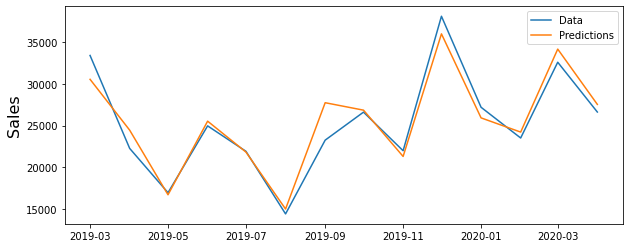

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(test)
plt.plot(predictions_prophet)

plt.legend(('Data', 'Predictions'), fontsize=10)

plt.ylabel('Sales', fontsize=16)

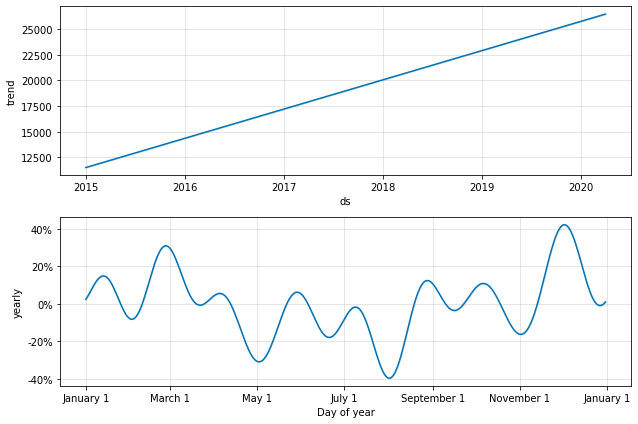

In [ ]:
plt2 = m.plot_components(forecast)

In [ ]:
mean_absolute_error(test, predictions_prophet)

1320.30823302167

In [ ]:
mean_absolute_percentage_error(test, predictions_prophet)

0.050889455559712804